### Graded Project
Machine Learning - Unsupervised Learning

### Domain:
○ E-commerce
Business Context:
● Customer segmentation is one of the most important marketing tools at your
disposal, because it can help a business to better understand its target audience.
This is because it groups customers based on common characteristics.
● Segmentation can be based on the customer’s habits and lifestyle, in
particular, their buying habits. Different age groups, for example, tend to
spend their money in different ways, so brands need to be aware of who
exactly is buying their product.
● Segmentation also focuses more on the personality of the consumer,
including their opinions, interests, reviews, and rating. Breaking down a
large customer base into more manageable clusters, making it easier to
identify your target audience and launch campaigns and promote the
business to the most relevant people
Dataset Description:
The dataset contains measurements of clothing fit from RentTheRunway.
RentTheRunWay is a unique platform that allows women to rent clothes for
various occasions. The collected data is of several categories. This dataset
contains self-reported fit feedback from customers as well as other side
information like reviews, ratings, product categories, catalog sizes, customers’
measurements (etc.)

### Attribute Information:
SL.No Attribute and Description
1. user_id - a unique id for the customer
2. item_id - unique product id
3. weight - weight measurement of customer
4. rented - for purpose clothing was rented for
5. body type - body type of customer
6. review_text - review given by the customer
7. size - the standardized size of the product
8. rating - rating for the product
9. age - age of the customer
10. category - the category of the product
11. bust size - bust measurement of customer
12. height - height of the customer
13. review_date - date when the review was written
14. fit - fit feedback

### Data Citation:
● Rishabh Misra, Mengting Wan, Julian McAuley "Decomposing Fit Semantics
for Product Size Recommendation in Metric Spaces". RecSys, 2018.
● Rishabh Misra, Jigyasa Grover "Sculpting Data for ML: The first act of
Machine Learning". 2021.

### Project Objective:
Based on the given users and items data of an e-commerce company, segment
the similar user and items into suitable clusters. Analyze the clusters and provide
your insights to help the organization promote their business.

### Import the required libraries and load the data: [ Score: 3 point ]

1. Load the required libraries and read the dataset. (1)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

2. Check the first few samples, shape, info of the data and try to familiarize
yourself with different features (2)

In [10]:
pd.set_option("display.width",18208)
pd.set_option("display.max_columns",None)

In [11]:
df = pd.read_csv('C:/Users/ANUbrr/Documents/DrSVRajashekararadhya_project_2_Python for DS/renttherunway.csv')
print(df.shape,'\n\n')
# print(df.info(),'\n\n')
df.head()

(192544, 16) 




,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [13]:
tot_rows, tot_cols = df.shape
print(tot_rows, tot_cols)

192544 16


### Data cleansing and Exploratory data analysis: [ Score: 20 point ]

3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [ ]:
df.drop_duplicates()

4. Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’, ‘review’) (1)

In [14]:
df_dropped = df.drop(columns=['item_id','review_text'])
print(len(df_dropped.columns))

14


In [15]:
df_dropped = df.drop(columns=['review_summary'])
print(len(df_dropped.columns))

15


Q5. Check the column 'weight', Is there any presence of string data? If yes, remove
the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [16]:
def clean_release(x):
    x = str(x)
    if 'lbs' in x:
        x = x.replace('float','')
    if "lbs" in x:
        m = 10 ** 6
        x = x.replace('float','')
        x = str(float(x) * m)
    if "lbs" in x:
        k = 10 ** 3
        x = x.replace('float','')
        x = str(float(x)*k)
    return x
    
# print(df_drop1['Release Clause'].tail(20))
#df_drop1['Release Clause'] = df_drop1['Release Clause'].apply(clean_release)
#df_drop1['Release Clause'].head()

Q6. Check the unique categories for the column 'rented for' and group 'party:
cocktail' category with 'party'. (2)

In [17]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts()) # to print count of every category

['fit' 'small' 'large']
fit      142058
small     25779
large     24707
Name: fit, dtype: int64
['34d' '34b' nan '34c' '32b' '34d+' '36d' '36a' '32d+' '36c' '32c' '32dd'
 '30dd' '32d' '36b' '34a' '34dd' '40ddd/e' '32a' '38d+' '38c' '34ddd/e'
 '38a' '38b' '38d' '36ddd/e' '38dd' '38f' '42dd' '36dd' '40g' '40dd' '28f'
 '30ddd/e' '32ddd/e' '28b' '36d+' '40d' '28dd' '34f' '42c' '30d' '30b'
 '42d' '34aa' '32aa' '36f' '28c' '40b' '36aa' '34g' '32f' '42ddd/e' '40c'
 '28g' '28aa' '36g' '30a' '44ddd/e' '30c' '30aa' '44dd' '32i' '32g' '30g'
 '38h' '30h' '34j' '38ddd/e' '32h' '28a' '44d' '40h' '38g' '34h' '36j'
 '40f' '36h' '28ddd/e' '44f' '34i' '30f' '36i' '30i' '28h' '42b' '42j'
 '32j' '46c' '48d' '38aa' '38i' '48dd' '28d' '28i' '46ddd/e' '42g' '44c'
 '42f' '40j' '38j' '46f' '44b' '44g' '42h' '40i' '44h']
34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: bust size, Length: 106, dtype: int64
['137lb

Stylist Review                                                       977
Great dress!                                                         532
RTR Team Review                                                      529
Beautiful dress!                                                     419
Loved this dress!                                                    413
                                                                    ... 
I wore it to my granddaughter's communion party.                       1
The lace and color!                                                    1
I ordered this dress for an work event.                                1
Nice dress to wear out to dinner                                       1
I wore this to a beautiful black tie optional wedding in Boston.       1
Name: review_summary, Length: 154736, dtype: int64
['romper' 'gown' 'sheath' 'dress' 'leggings' 'top' 'jumpsuit' 'sweater'
 'jacket' 'shirtdress' 'maxi' 'shift' 'pants' 'shirt' 'mini' 'skirt'
 'pul

In [18]:
pd.groupby('party: cocktail')['rented for'].value_counts()

AttributeError: module 'pandas' has no attribute 'groupby'

Q7. The column 'height' is in feet with a quotation mark, Convert to inches with
float datatype. (3)

In [19]:
def get_cms(x):
    if type(x) == type(1.0):
        return
    #print(x)
    try: 
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)
df.height = df.height.apply(get_cms)

In [20]:
df[df.height.isnull()].head(20)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
205,205,fit,344452,36dd,938882,NaN,4.0,everyday,boxy and weird. oversized in shoulders even th...,NaN,"awkward shape for curvy bodies, even in the la...",dress,NaN,24,30.0,"December 5, 2017"
524,524,fit,670031,36c,2845075,NaN,8.0,everyday,Color was beautiful. Fit very relaxed.,hourglass,Comfortable chic!,top,NaN,20,58.0,"July 16, 2017"
543,543,fit,584225,NaN,158028,NaN,10.0,formal affair,Dress fit like a glove! Runs very true to size...,pear,Compliments even from strangers!!!,gown,NaN,28,46.0,"April 27, 2014"
840,840,fit,533354,NaN,125465,NaN,8.0,formal affair,Getting this dress was so easy and I loved it!...,hourglass,I got so many compliments on this dress. Order...,gown,NaN,40,25.0,"April 6, 2014"
924,924,fit,377867,34a,1695279,150lbs,10.0,wedding,Awesome dress for an evening wedding! Received...,athletic,Picked the dress up at the store - so easy!,sheath,NaN,16,28.0,"June 13, 2014"
1602,1602,fit,565698,34b,2700492,132lbs,10.0,date,I really liked this romper. I'm a true pear sh...,pear,Great Basic Romper,romper,NaN,8,28.0,"May 18, 2017"
1639,1639,fit,484895,38d,865225,190lbs,10.0,formal affair,"Nice fit everywhere, flowy at the bottom.",full bust,"Great dress, great compliments the whole night!",dress,NaN,28,27.0,"May 14, 2016"
2461,2461,fit,490333,36d,174086,150lbs,8.0,wedding,I had originally ordered the 8 and the 10 and ...,hourglass,The color and the lace detail on this dress we...,dress,NaN,20,31.0,"November 4, 2017"
2915,2915,fit,845314,32b,2456539,135lbs,8.0,party,Great outfit to make you feel great. Material ...,NaN,Feel great and confident!,jumpsuit,NaN,12,29.0,"December 7, 2017"
3221,3221,fit,774889,34c,1647277,NaN,8.0,wedding,The dress is very pretty! I got both the mediu...,athletic,Outdoor fall wedding,dress,NaN,20,30.0,"November 27, 2016"


Q8. Check for missing values in each column of the dataset? If it exists, impute
them with appropriate methods. (3)

In [21]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
Unnamed: 0,0,0.000000
fit,0,0.000000
user_id,0,0.000000
bust size,18411,22.238193
item_id,0,0.000000
weight,29982,36.214519
rating,82,0.099046
rented for,10,0.012079
review_text,62,0.074888
body type,14637,17.679671


Q9. Check the statistical summary for the numerical and categorical columns and
write your findings. (3)

In [22]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,height,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,191867.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,152.496269,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,3.986492,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,121.920000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,152.400000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,152.400000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,152.400000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,182.880000,58.000000,117.000000


Q10. Are there outliers present in the column age? If yes, treat them with the
appropriate method. (3)

In [23]:
df.sort_values(by=['age'], ascending=False).head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
87624,87624,fit,382067,38c,134015,162lbs,10.0,formal affair,"Great fit, helped to hid a few lumps and bumps.",pear,"Attended a masquerade ball, a very formal affair.",gown,152.4,29,117.0,"February 9, 2015"
140708,140708,fit,85464,32d,445150,115lbs,8.0,work,I ordered the Small and Medium because I am a ...,hourglass,Perfect classy dress for a work luncheon,sheath,152.4,4,117.0,"November 1, 2017"
137447,137447,fit,85464,32d,1832896,115lbs,8.0,formal affair,This fit very well and worked perfectly for th...,hourglass,Great elegant party dress,sheath,152.4,4,117.0,"September 28, 2015"
81383,81383,fit,12528,32d,957927,105lbs,10.0,party,Fit great. It's classy and sexy without showin...,petite,Perfect for hosting a summer bridal shower,dress,152.4,1,117.0,"June 29, 2017"
18013,18013,fit,12528,32d,137585,105lbs,10.0,formal affair,I wore this to my engagement party. Fit like a...,petite,Sparkle and Fit made my Engagement Party!,sheath,152.4,1,117.0,"February 13, 2015"


Q11. Check the distribution of the different categories in the column 'rented for'
using appropriate plot. (2)

AttributeError: 'DataFrame' object has no attribute 'bust_size'

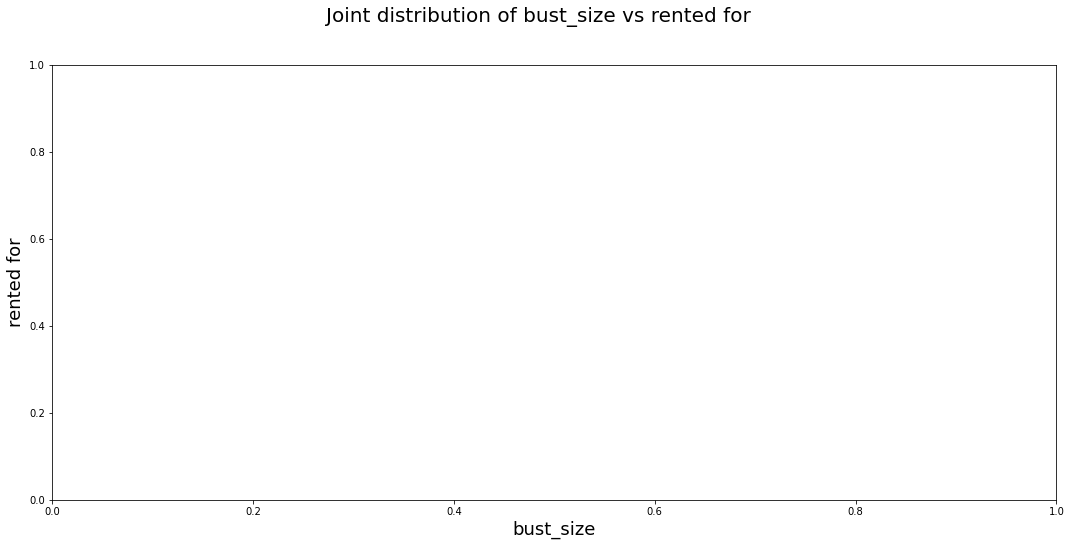

In [49]:
df = pd.read_csv('C:/Users/ANUbrr/Documents/DrSVRajashekararadhya_project_2_Python for DS/renttherunway.csv')
plt.figure(figsize=(18,8))
plt.xlabel("bust_size", fontsize=18)
plt.ylabel("rented for", fontsize=18)
plt.suptitle("Joint distribution of bust_size vs rented for", fontsize= 20)
plt.plot(df.bust_size, df['rented for'], 'bo', alpha=0.1)
plt.show()

● Data Preparation for model building: [ Score: 2 point ]

Q12. Encode the categorical variables in the dataset. (1)

In [ ]:
df= pd.get_dummies(df, prefix={'fit':'fit',
                                        'weight':'weight',
                                        'height':'height'},
                            drop_first=False)

Q13. Standardize the data, so that the values are within a particular range. (1)

In [26]:
df = pd.DataFrame(pd.DataFrame(df[['fit','weight', 'height']]))

● Principal Component Analysis and Clustering: [ Score: 23 point ]

14. Apply PCA on the above dataset and determine the number of PCA
components to be used so that 90-95% of the variance in data is explained by
the same. (7)

In [ ]:
##step1
cov_matrix =np.cov(scaled_features.T)
cov_matrix

In [ ]:
##step2
eig_vals,eig_vectors = np.linalg.eig(cov_matrix)
print('eigein vals:','\n',eig_vals)
print('/')
print('eigein vectors:','\n',eig_vectors)

In [ ]:
##step 3
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance: ',var_exp)
print('Cummulative Variance Explained:',cum_var_exp)

In [ ]:
plt.bar(range(10),var_exp,align='center',color='lightgreen',edgecolor='black',label='Explained Variance')
plt.step(range(10),cum_var_exp,where='mid',color='red',label='Cummulative Explained Variance')
plt.xlable('Principal Components')
plt.ylable('Explained Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

15. 
    Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)


a. Find the optimal K Value using elbow plot for K Means clustering. b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot. c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [ ]:
pca =PCA(n_components=8)

pca_df = pd.Dataframe(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_df.head()

In [ ]:
##finding optimal k value by KMeans clusters using Elbow plot
cluster_errors=[]
cluster_range =range(2,15)
for num_clusters in cluster_range:
    clusters  = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

In [ ]:
##creating a dataframe of number of cluster and cluster errors
cluster_df= pd.DataFram({'num_clusters':cluster_range,'clusters_errors':cluster_errors})
##Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()

In [ ]:
kmeans =KMeans(n_cluster=3,random_state=100)
kmeans.fit(pca_df)

In [ ]:
label = pd.DataFrame(kmeans.lables_,columns=['label'])

16. Apply Agglomerative clustering and segment the data. (You may use
original data or PCA transformed data) (8)

a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique. (Hint: Take a sample of the dataset for agglomerative
clustering to reduce the computational time)

In [ ]:
plt.figure(figsize=[18,5])
merg = linkage(scaled_features,method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylable('Euclidean distance')
plt.show()

● Conclusion : [ Score: 2 point ]
    
17. Perform cluster analysis by doing bivariate analysis between cluster labels
and different features and write your conclusion on the results. (2)

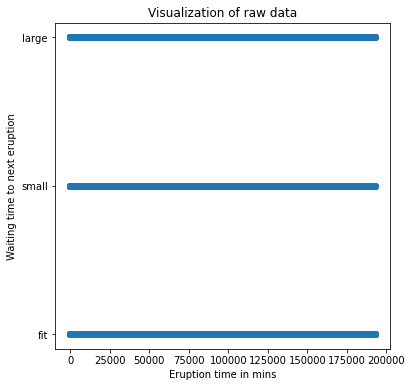

In [53]:
df = pd.read_csv('C:/Users/ANUbrr/Documents/DrSVRajashekararadhya_project_2_Python for DS/renttherunway.csv')
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

Thank you